# Bangalore House Price Prediction
### Real Estate Price Modeling using Machine Learning

This project predicts house prices in Bangalore based on:
- Location
- Total Square Feet (Area)
- Number of Bedrooms (BHK)
- Number of Bathrooms
- Balcony
- 
The dataset is preprocessed by handling missing values, converting area ranges into numeric values, removing outliers, and encoding categorical location data.

The cleaned data is then used to train a Linear Regression model which learns the relationship between house features and price.

Concepts Covered:
• Regression
• Best Fit Line
• RMSE (Root Mean Square Error)
• R² Score
• Residual Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

In [2]:
df = pd.read_csv('/kaggle/input/datasets/amitabhajoy/bengaluru-house-price-data/Bengaluru_House_Data.csv')
df.head()
print("Dataset loaded successfully. It contains real house data from Bangalore.")

Dataset loaded successfully. It contains real house data from Bangalore.


In [3]:
print(df.shape)
print(df.columns)
df.info()

(13320, 9)
Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df = df[['location','size','total_sqft','bath','balcony','price']]
df.head()

print("Removed unnecessary columns to focus only on important features affecting price.")


Removed unnecessary columns to focus only on important features affecting price.


In [5]:
df = df.copy()
if 'size' in df.columns:
    df.loc[:, 'bhk'] = df['size'].str.extract(r'(\d+)').astype(float)
    df = df.drop(columns=['size'])
    print("BHK extracted from size column.")
else:
    print("Size column already removed. BHK column exists.")
df.head()


BHK extracted from size column.


,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0
2,Uttarahalli,1440,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0
4,Kothanur,1200,2.0,1.0,51.00,2.0


In [6]:
def convert_sqft(x):
    try:
        if '-' in str(x):
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)

print("Converted total_sqft into numeric format so model can process it.")


Converted total_sqft into numeric format so model can process it.


In [7]:
df = df.dropna()
print("Remaining rows:", df.shape[0])
print("Removed missing values for better model accuracy.")


Remaining rows: 12668
Removed missing values for better model accuracy.


In [8]:
df['price_per_sqft'] = (df['price']*100000)/df['total_sqft']
df = df[(df['price_per_sqft'] > 1000) & (df['price_per_sqft'] < 30000)]
df.drop('price_per_sqft', axis=1, inplace=True)
print("]Removed unrealistic price outliers to improve model performance.")


]Removed unrealistic price outliers to improve model performance.


In [9]:
top_locations = df['location'].value_counts().head(10).index
df = df[df['location'].isin(top_locations)]
print("Selected top 10 most common locations to reduce noise.")


Selected top 10 most common locations to reduce noise.


In [10]:
df = pd.get_dummies(df, columns=['location'], drop_first=True)
df.head()
print("Converted categorical location data into numeric format using One-Hot Encoding.")


Converted categorical location data into numeric format using One-Hot Encoding.


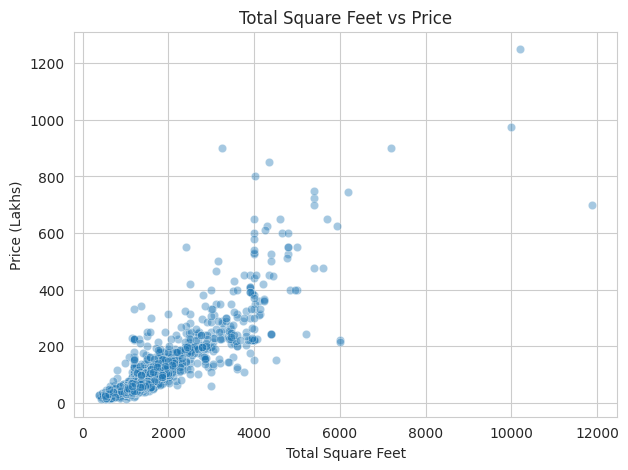

This scatter plot shows the relationship between house size and price. We can see a positive trend — as area increases, price increases.


In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='total_sqft', y='price', data=df, alpha=0.4)

plt.title("Total Square Feet vs Price")
plt.xlabel("Total Square Feet")
plt.ylabel("Price (Lakhs)")
plt.show()

print("This scatter plot shows the relationship between house size and price. We can see a positive trend — as area increases, price increases.")


In [12]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X contains house features. y contains house price.")

X contains house features. y contains house price.


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [14]:
y_pred = model.predict(X_test)
print("Model predicted house prices for unseen test data.")

Model predicted house prices for unseen test data.


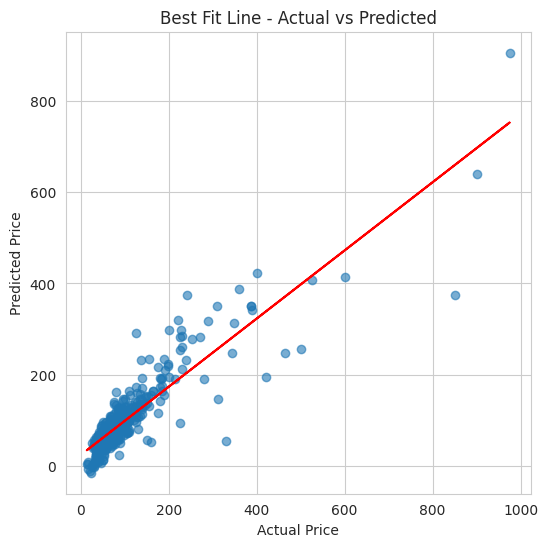

Points closer to red line indicate better prediction accuracy.


In [15]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)

m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Best Fit Line - Actual vs Predicted")
plt.show()

print("Points closer to red line indicate better prediction accuracy.")


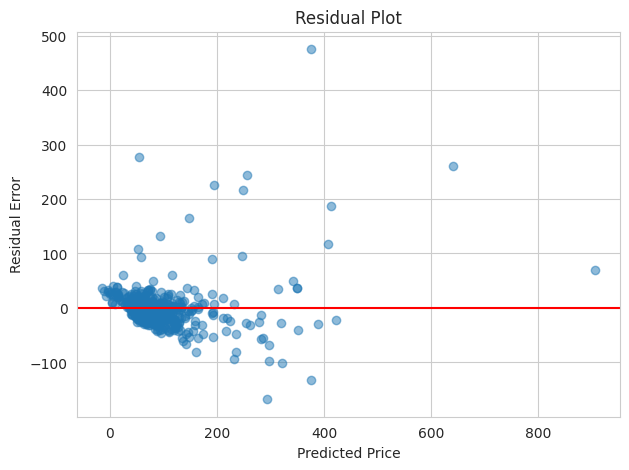

Residual plot shows prediction errors. If errors are randomly scattered around zero, the regression model is appropriate.


In [16]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red')

plt.xlabel("Predicted Price")
plt.ylabel("Residual Error")
plt.title("Residual Plot")
plt.show()

print("Residual plot shows prediction errors. If errors are randomly scattered around zero, the regression model is appropriate.")


In [17]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("RMSE represents average prediction error in Lakhs. After outlier removal, RMSE is significantly reduced.")


RMSE: 43.39804159826016
RMSE represents average prediction error in Lakhs. After outlier removal, RMSE is significantly reduced.


In [18]:
sample = X_test.iloc[[0]]
prediction = model.predict(sample)

print("Predicted Price:", prediction[0], "Lakhs")
print("Actual Price:", y_test.iloc[0], "Lakhs")
print("This compares predicted price with actual price for a test house.")


Predicted Price: 75.15002047014237 Lakhs
Actual Price: 68.5 Lakhs
This compares predicted price with actual price for a test house.


### Conclusion:

The Linear Regression model predicts house prices based on total square feet.

The best fit line shows price increases as house size increases.
RMSE measures prediction error magnitude.
R² score shows how well the model explains price variation.
Residual plot confirms the model fits reasonably well.

Thus regression successfully models real estate pricing trends.
